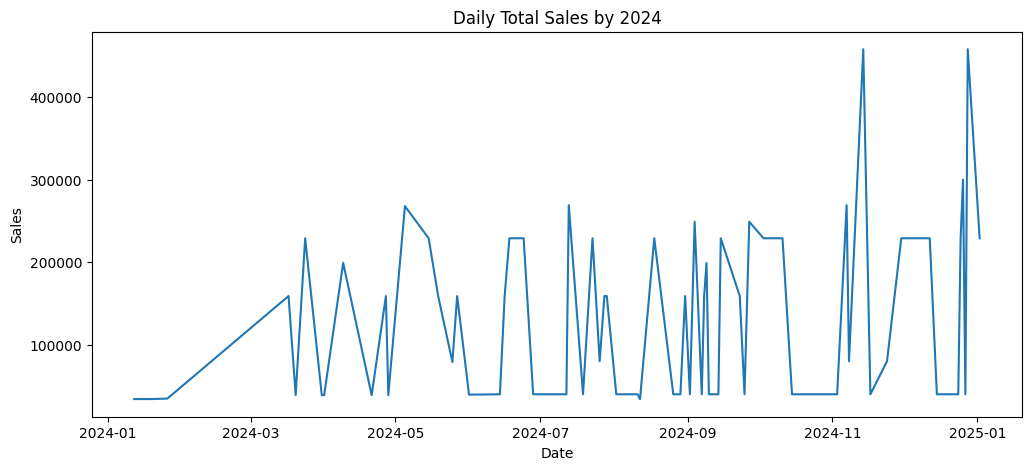

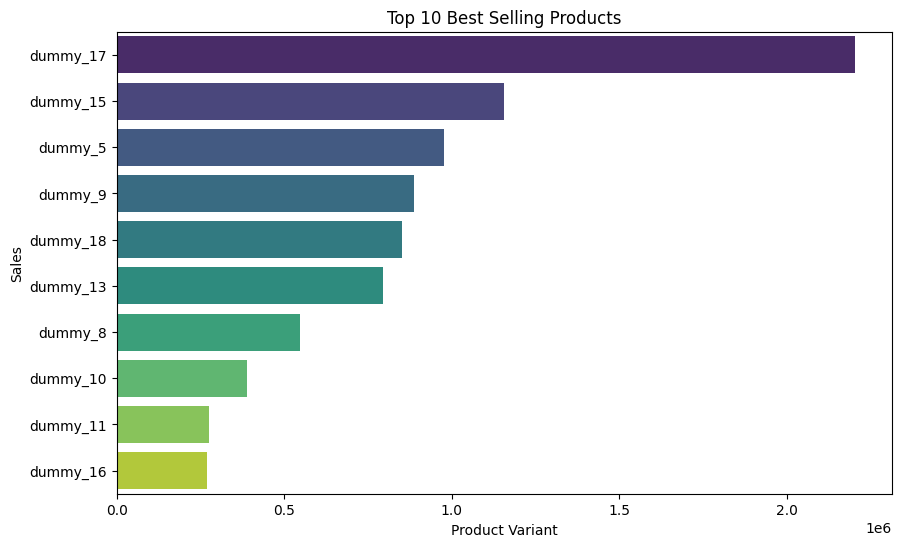

Repeat customer: 1
Repeat Customer Rate: 1.20%


In [1]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('../scripts')  
from load_data import load_and_clean_data

df = load_and_clean_data()

# 1. Sales Trend
# df['order_completion_date'] = pd.to_datetime(df['order_completion_date'])
sales_by_day = df.groupby(df['order_completion_date'].dt.date)['total_price'].sum()

plt.figure(figsize=(12,5))
sales_by_day.plot()
plt.title("Daily Total Sales by 2024")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

# 2. Top-Selling Product Variant
top_products = df.groupby('variant')['total_price'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
x = top_products.values
y = top_products.index
sns.barplot(x=x, y=y, palette='viridis', hue=y)
plt.title("Top 10 Best Selling Products")
plt.xlabel("Product Variant")
plt.ylabel("Sales")
plt.tight_layout
plt.show()

# 3. Basic Consumer Insight
user_date = df[['username', 'order_completion_date']].drop_duplicates()  # Remove duplicate (username, date) pairs to count each purchase per day only once per user
order_counts = user_date['username'].value_counts() #count each user purchased in diff dates
repeat_customer_count= (order_counts >1).sum() #consumer who buy product >1 time
repeat_rate = repeat_customer_count/ order_counts.shape[0] #df.shape -> (rows, columns); 

print(f"Repeat customer: {repeat_customer_count}")
print(f"Repeat Customer Rate: {repeat_rate:0.2%}")